<a href="https://colab.research.google.com/github/dharalakshmi/Tourism-Routes/blob/main/visualazation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
!pip install -q pandas numpy scikit-learn matplotlib seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

pd.set_option('display.max_columns', 100)
%matplotlib inline


In [10]:
from google.colab import files
up = files.upload()   # select your file, e.g., "merged_tourism_data.csv"
list(up.keys())


Saving merged_tourism_data_cleaned (1).csv to merged_tourism_data_cleaned (1).csv


['merged_tourism_data_cleaned (1).csv']

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [12]:
# 1. DATA LOADING (Assuming you've already cleaned the data)

# Load the cleaned data
df = pd.read_csv('merged_tourism_data_cleaned (1).csv')
print("Dataset loaded successfully!")
print(f"Shape: {df.shape}")
print("\nColumns:", df.columns.tolist())


Dataset loaded successfully!
Shape: (506, 14)

Columns: ['Origin', 'Destination', 'Distance', 'Origin_Lat', 'Origin_Long', 'Origin_State', 'Dest_Lat', 'Dest_Long', 'Dest_State', 'Ratings', 'Ideal_duration', 'Name', 'Type', 'Best Time to visit']


In [13]:
# 2. EXPLORATORY DATA ANALYSIS (EDA)

print("="*60)
print("EXPLORATORY DATA ANALYSIS")
print("="*60)

# Basic information about the dataset
print("\n1. Dataset Overview:")
print("-" * 30)
print(df.info())
print("\nFirst 5 rows:")
print(df.head())


EXPLORATORY DATA ANALYSIS

1. Dataset Overview:
------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Origin              506 non-null    object 
 1   Destination         506 non-null    object 
 2   Distance            506 non-null    int64  
 3   Origin_Lat          506 non-null    object 
 4   Origin_Long         506 non-null    float64
 5   Origin_State        506 non-null    object 
 6   Dest_Lat            506 non-null    object 
 7   Dest_Long           506 non-null    float64
 8   Dest_State          506 non-null    object 
 9   Ratings             506 non-null    float64
 10  Ideal_duration      479 non-null    object 
 11  Name                505 non-null    object 
 12  Type                505 non-null    object 
 13  Best Time to visit  505 non-null    object 
dtypes: float64(3), int64(1), ob

In [14]:
# Check for missing values
print("\n2. Missing Values:")
print("-" * 20)
print(df.isnull().sum())



2. Missing Values:
--------------------
Origin                 0
Destination            0
Distance               0
Origin_Lat             0
Origin_Long            0
Origin_State           0
Dest_Lat               0
Dest_Long              0
Dest_State             0
Ratings                0
Ideal_duration        27
Name                   1
Type                   1
Best Time to visit     1
dtype: int64


In [15]:
# Basic statistics
print("\n3. Statistical Summary:")
print("-" * 25)
print(df.describe())


3. Statistical Summary:
-------------------------
          Distance  Origin_Long   Dest_Long     Ratings
count   506.000000   506.000000  506.000000  506.000000
mean    814.727273    77.861726   77.984526    4.209486
std     470.722529     4.193806    4.948973    0.135665
min      89.000000    72.587265   72.587265    3.900000
25%     553.000000    73.849852   74.123996    4.100000
50%     674.000000    77.231495   77.231495    4.200000
75%    1305.000000    80.248357   78.456355    4.300000
max    2208.000000    88.363044   88.363044    4.500000


In [16]:
# Unique values in categorical columns
print("\n4. Unique Values in Key Columns:")
print("-" * 40)
categorical_cols = ['Origin', 'Destination', 'Origin_State', 'Dest_State', 'Type', 'Best Time to visit']
for col in categorical_cols:
    if col in df.columns:
        print(f"{col}: {df[col].nunique()} unique values")



4. Unique Values in Key Columns:
----------------------------------------
Origin: 20 unique values
Destination: 20 unique values
Origin_State: 14 unique values
Dest_State: 14 unique values
Type: 35 unique values
Best Time to visit: 7 unique values


In [17]:
# Top origins and destinations
print("\n5. Top 10 Origins and Destinations:")
print("-" * 42)
print("Top Origins:")
print(df['Origin'].value_counts().head(10))
print("\nTop Destinations:")
print(df['Destination'].value_counts().head(10))



5. Top 10 Origins and Destinations:
------------------------------------------
Top Origins:
Origin
Hyderabad    54
Mumbai       46
Chennai      37
Udaipur      36
Jaipur       34
Delhi        33
Pune         28
Bengaluru    27
Goa          27
Kolkata      23
Name: count, dtype: int64

Top Destinations:
Destination
Delhi        112
Mumbai        80
Hyderabad     77
Kolkata       70
Goa           56
Ahmedabad     20
Jaipur        15
Bengaluru     12
Kochi         12
Patna          9
Name: count, dtype: int64


In [18]:
# Attraction types analysis
print("\n6. Attraction Types Distribution:")
print("-" * 35)
print(df['Type'].value_counts())


6. Attraction Types Distribution:
-----------------------------------
Type
Temple                       58
Beach                        46
Museum                       39
Fort                         37
Park                         31
Zoo                          29
Monument                     27
Palace                       22
Mall                         20
Science                      18
Amusement Park               17
Lake                         13
Market                       11
Site                         10
National Park                 8
Church                        8
Promenade                     8
Religious Shrine              8
War Memorial                  7
Tomb                          7
Theme Park                    7
Stepwell                      7
Observatory                   7
Film Studio                   7
Tombs                         7
Bridge                        7
Landmark                      7
Cricket Ground                7
Waterfall                   

In [19]:
# Distance analysis
print("\n7. Distance Analysis:")
print("-" * 22)
print(f"Average distance: {df['Distance'].mean():.2f} km")
print(f"Median distance: {df['Distance'].median():.2f} km")
print(f"Min distance: {df['Distance'].min()} km")
print(f"Max distance: {df['Distance'].max()} km")


7. Distance Analysis:
----------------------
Average distance: 814.73 km
Median distance: 674.00 km
Min distance: 89 km
Max distance: 2208 km


In [20]:
# Ratings analysis
print("\n8. Ratings Analysis:")
print("-" * 21)
print(f"Average rating: {df['Ratings'].mean():.2f}")
print(f"Rating distribution:")
print(df['Ratings'].value_counts().sort_index())


8. Ratings Analysis:
---------------------
Average rating: 4.21
Rating distribution:
Ratings
3.9      6
4.1    215
4.2    137
4.3     74
4.4     15
4.5     59
Name: count, dtype: int64



CREATING EDA VISUALIZATIONS


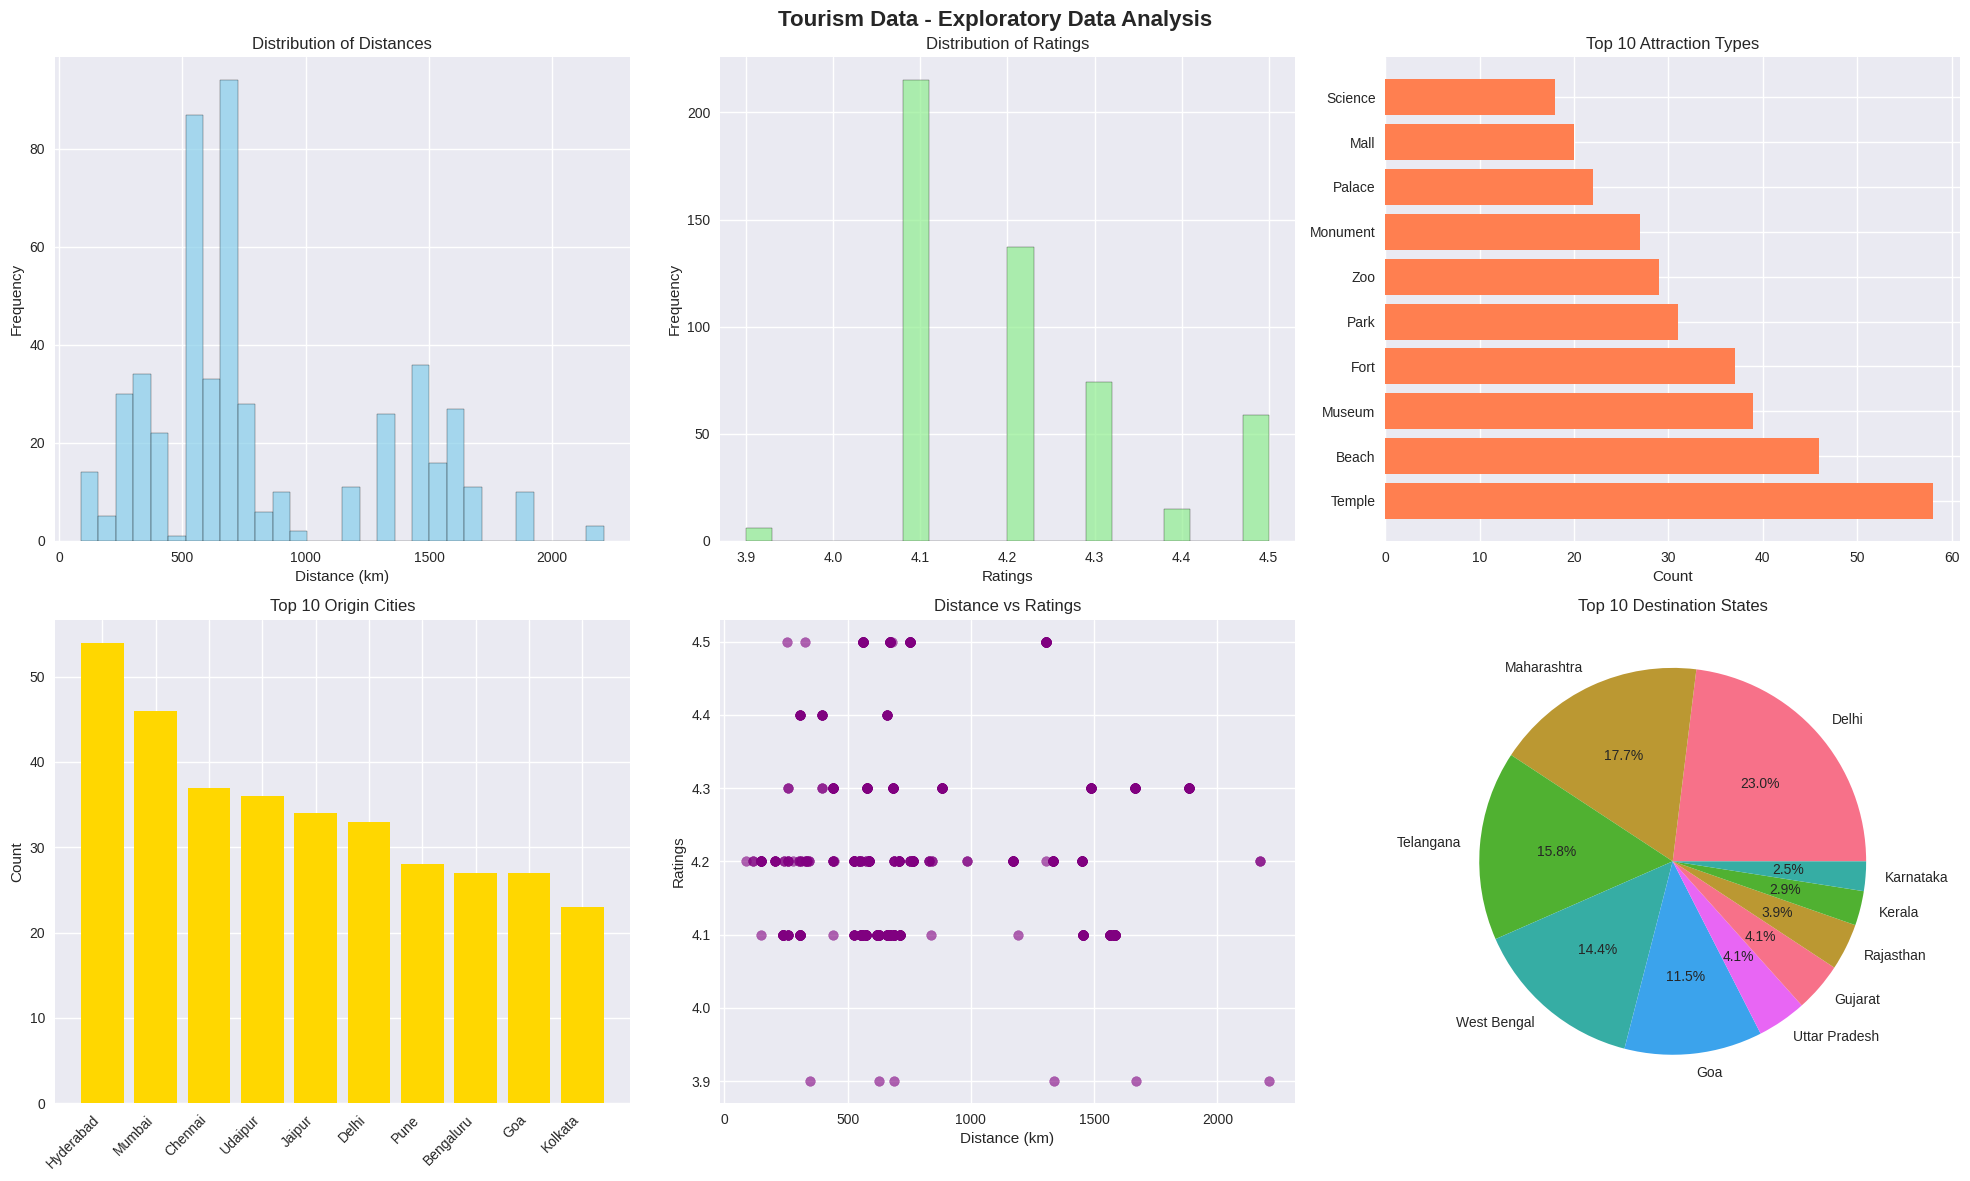

In [22]:
# 3. VISUALIZATION - EDA PLOTS
# =============================================================================

print("\n" + "="*60)
print("CREATING EDA VISUALIZATIONS")
print("="*60)

# Set up the plotting area
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
fig.suptitle('Tourism Data - Exploratory Data Analysis', fontsize=16, fontweight='bold')

# Plot 1: Distance Distribution
axes[0, 0].hist(df['Distance'], bins=30, color='skyblue', alpha=0.7, edgecolor='black')
axes[0, 0].set_title('Distribution of Distances')
axes[0, 0].set_xlabel('Distance (km)')
axes[0, 0].set_ylabel('Frequency')

# Plot 2: Ratings Distribution
axes[0, 1].hist(df['Ratings'], bins=20, color='lightgreen', alpha=0.7, edgecolor='black')
axes[0, 1].set_title('Distribution of Ratings')
axes[0, 1].set_xlabel('Ratings')
axes[0, 1].set_ylabel('Frequency')

# Plot 3: Top 10 Attraction Types
top_types = df['Type'].value_counts().head(10)
axes[0, 2].barh(range(len(top_types)), top_types.values, color='coral')
axes[0, 2].set_yticks(range(len(top_types)))
axes[0, 2].set_yticklabels(top_types.index)
axes[0, 2].set_title('Top 10 Attraction Types')
axes[0, 2].set_xlabel('Count')

# Plot 4: Top 10 Origins
top_origins = df['Origin'].value_counts().head(10)
axes[1, 0].bar(range(len(top_origins)), top_origins.values, color='gold')
axes[1, 0].set_xticks(range(len(top_origins)))
axes[1, 0].set_xticklabels(top_origins.index, rotation=45, ha='right')
axes[1, 0].set_title('Top 10 Origin Cities')
axes[1, 0].set_ylabel('Count')

# Plot 5: Distance vs Ratings Scatter
axes[1, 1].scatter(df['Distance'], df['Ratings'], alpha=0.6, color='purple')
axes[1, 1].set_title('Distance vs Ratings')
axes[1, 1].set_xlabel('Distance (km)')
axes[1, 1].set_ylabel('Ratings')

# Plot 6: State-wise Distribution
state_counts = df['Dest_State'].value_counts().head(10)
axes[1, 2].pie(state_counts.values, labels=state_counts.index, autopct='%1.1f%%')
axes[1, 2].set_title('Top 10 Destination States')

plt.tight_layout()
plt.show()

In [24]:
# Additional interactive plots using Plotly
print("\nCreating interactive visualizations...")

# Convert latitude and longitude columns to numeric, coercing errors
df['Dest_Lat'] = pd.to_numeric(df['Dest_Lat'], errors='coerce')
df['Dest_Long'] = pd.to_numeric(df['Dest_Long'], errors='coerce')
df['Origin_Lat'] = pd.to_numeric(df['Origin_Lat'], errors='coerce')
df['Origin_Long'] = pd.to_numeric(df['Origin_Long'], errors='coerce')


# Interactive map of destinations
fig_map = px.scatter_mapbox(df.drop_duplicates(['Destination']).dropna(subset=['Dest_Lat', 'Dest_Long']),
                           lat="Dest_Lat", lon="Dest_Long",
                           hover_name="Destination",
                           hover_data=["Dest_State", "Ratings"],
                           color="Ratings",
                           size="Ratings",
                           color_continuous_scale="Viridis",
                           mapbox_style="open-street-map",
                           title="Tourist Destinations in India",
                           height=600)
fig_map.show()


Creating interactive visualizations...


In [27]:
# 4. FEATURE ENGINEERING


print("\n" + "="*60)
print("FEATURE ENGINEERING")
print("="*60)

# Create a copy for feature engineering
df_features = df.copy()

# 1. Distance Categories
print("1. Creating distance categories...")
df_features['Distance_Category'] = pd.cut(df_features['Distance'],
                                         bins=[0, 200, 500, 1000, 2500],
                                         labels=['Short', 'Medium', 'Long', 'Very Long'])

# 2. Rating Categories
print("2. Creating rating categories...")
df_features['Rating_Category'] = pd.cut(df_features['Ratings'],
                                       bins=[0, 3.5, 4.0, 4.5, 5.0],
                                       labels=['Low', 'Medium', 'High', 'Excellent'])

# 3. Time-based features
print("3. Processing time-related features...")
# Extract ideal duration (assuming it's in days format like "01-Feb" meaning 1-2 days)
def extract_duration(duration_str):
    if pd.isna(duration_str):
        return None
    try:
        # Extract numbers from the string
        nums = [int(x) for x in duration_str.split('-') if x.isdigit()]
        if nums:
            return max(nums)  # Take the maximum duration
        return None
    except:
        return None

df_features['Duration_Days'] = df_features['Ideal_duration'].apply(extract_duration)

# 4. Best time categories
print("4. Categorizing best visit times...")
def categorize_time(time_str):
    if pd.isna(time_str):
        return 'Unknown'
    time_str = str(time_str).lower()
    if 'morning' in time_str:
        return 'Morning'
    elif 'afternoon' in time_str:
        return 'Afternoon'
    elif 'evening' in time_str:
        return 'Evening'
    elif 'night' in time_str:
        return 'Night'
    elif 'all' in time_str:
        return 'All Day'
    else:
        return 'Other'

df_features['Visit_Time_Category'] = df_features['Best Time to visit'].apply(categorize_time)

# 5. Geographic features
print("5. Creating geographic features...")
# Calculate center points for origin-destination pairs
df_features['Center_Lat'] = (df_features['Origin_Lat'] + df_features['Dest_Lat']) / 2
df_features['Center_Long'] = (df_features['Origin_Long'] + df_features['Dest_Long']) / 2

# 6. Route popularity (count of attractions per route)
print("6. Calculating route popularity...")
route_popularity = df_features.groupby(['Origin', 'Destination']).size().reset_index(name='Route_Popularity')
df_features = df_features.merge(route_popularity, on=['Origin', 'Destination'], how='left')

# 7. State connectivity features
print("7. Analyzing state connectivity...")
state_connections = df_features.groupby('Origin_State')['Dest_State'].nunique().reset_index()
state_connections.columns = ['Origin_State', 'Connected_States_Count']
df_features = df_features.merge(state_connections, on='Origin_State', how='left')

# 8. Create attraction type encoding
print("8. Encoding attraction types...")
from sklearn.preprocessing import LabelEncoder
le_type = LabelEncoder()
df_features['Type_Encoded'] = le_type.fit_transform(df_features['Type'])

print("Feature engineering completed!")
print(f"New features created: {len(df_features.columns) - len(df.columns)}")
print("New columns:", [col for col in df_features.columns if col not in df.columns])


FEATURE ENGINEERING
1. Creating distance categories...
2. Creating rating categories...
3. Processing time-related features...
4. Categorizing best visit times...
5. Creating geographic features...
6. Calculating route popularity...
7. Analyzing state connectivity...
8. Encoding attraction types...
Feature engineering completed!
New features created: 9
New columns: ['Distance_Category', 'Rating_Category', 'Duration_Days', 'Visit_Time_Category', 'Center_Lat', 'Center_Long', 'Route_Popularity', 'Connected_States_Count', 'Type_Encoded']



CLUSTERING AND ROUTE ANALYSIS
1. Preparing data for clustering...
2. Standardizing features...
3. Finding optimal number of clusters...


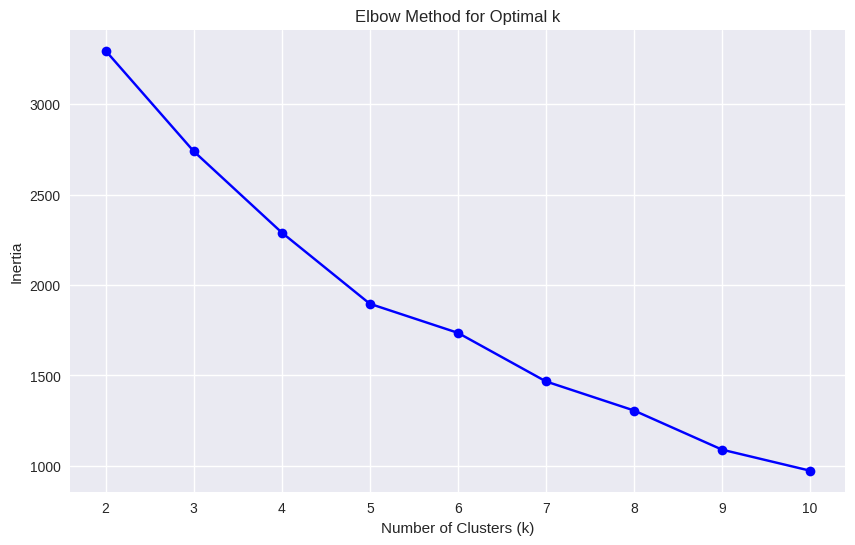

In [28]:
# 5. CLUSTERING AND ROUTE ANALYSIS


print("\n" + "="*60)
print("CLUSTERING AND ROUTE ANALYSIS")
print("="*60)

# Prepare data for clustering
print("1. Preparing data for clustering...")

# Select numerical features for clustering
clustering_features = ['Distance', 'Ratings', 'Origin_Lat', 'Origin_Long',
                      'Dest_Lat', 'Dest_Long', 'Route_Popularity', 'Connected_States_Count']

# Handle missing values
df_cluster = df_features[clustering_features].fillna(df_features[clustering_features].median())

# Standardize the features
print("2. Standardizing features...")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cluster)

# Determine optimal number of clusters using elbow method
print("3. Finding optimal number of clusters...")
inertias = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(10, 6))
plt.plot(K_range, inertias, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

In [29]:
# Apply K-Means clustering (using k=5 as example)
print("4. Applying K-Means clustering...")
optimal_k = 5  # You can adjust this based on the elbow plot
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to the dataframe
df_features['Cluster'] = clusters

# Analyze clusters
print("5. Analyzing clusters...")
cluster_analysis = df_features.groupby('Cluster').agg({
    'Distance': ['mean', 'std'],
    'Ratings': ['mean', 'std'],
    'Route_Popularity': ['mean', 'std'],
    'Type': lambda x: x.mode().iloc[0] if not x.empty else 'Unknown'
}).round(2)

print("Cluster Analysis:")
print(cluster_analysis)

4. Applying K-Means clustering...
5. Analyzing clusters...
Cluster Analysis:
        Distance         Ratings       Route_Popularity           Type
            mean     std    mean   std             mean   std <lambda>
Cluster                                                               
0         823.75  288.69    4.50  0.00            14.00  0.00    Beach
1         521.64  255.65    4.17  0.10            10.96  5.37     Fort
2         651.34  281.15    4.14  0.07             8.37  3.63   Temple
3        1592.86  160.54    4.17  0.09            12.69  3.46   Temple
4         563.92  214.28    4.28  0.07             7.13  3.85   Temple


In [30]:
# Route analysis
print("\n6. Route Analysis:")
print("-" * 20)

# Most popular routes
popular_routes = df_features.groupby(['Origin', 'Destination']).agg({
    'Route_Popularity': 'first',
    'Distance': 'first',
    'Ratings': 'mean',
    'Name': 'count'
}).sort_values('Route_Popularity', ascending=False).head(10)
popular_routes.columns = ['Route_Popularity', 'Distance', 'Avg_Rating', 'Attraction_Count']

print("Top 10 Most Popular Routes:")
print(popular_routes)


6. Route Analysis:
--------------------
Top 10 Most Popular Routes:
                       Route_Popularity  Distance  Avg_Rating  \
Origin    Destination                                           
Agra      Delhi                      16       240         4.1   
Lucknow   Delhi                      16       553         4.1   
Jaipur    Delhi                      16       308         4.1   
Hyderabad Delhi                      16      1583         4.1   
Kolkata   Delhi                      16      1563         4.1   
Udaipur   Delhi                      16       688         4.1   
Mumbai    Delhi                      16      1453         4.1   
Kochi     Goa                        14       754         4.5   
Hyderabad Goa                        14       674         4.5   
Bengaluru Goa                        14       562         4.5   

                       Attraction_Count  
Origin    Destination                    
Agra      Delhi                      16  
Lucknow   Delhi         

In [31]:
# Best rated routes
best_routes = df_features.groupby(['Origin', 'Destination']).agg({
    'Ratings': 'mean',
    'Distance': 'first',
    'Name': 'count'
}).sort_values('Ratings', ascending=False).head(10)
best_routes.columns = ['Avg_Rating', 'Distance', 'Attraction_Count']

print("\nTop 10 Best Rated Routes:")
print(best_routes)


Top 10 Best Rated Routes:
                                Avg_Rating  Distance  Attraction_Count
Origin             Destination                                        
Bengaluru          Goa                 4.5       562                14
Kanpur             Varanasi            4.5       328                 1
Kochi              Goa                 4.5       754                14
Hyderabad          Goa                 4.5       674                14
Kolkata            Varanasi            4.5       680                 1
Patna              Varanasi            4.5       256                 1
Thiruvananthapuram Goa                 4.5      1305                14
Udaipur            Jaipur              4.4       397                 5
Delhi              Jaipur              4.4       307                 5
Ahmedabad          Jaipur              4.4       660                 5



ADVANCED VISUALIZATIONS AND INSIGHTS
1. Creating cluster visualizations...


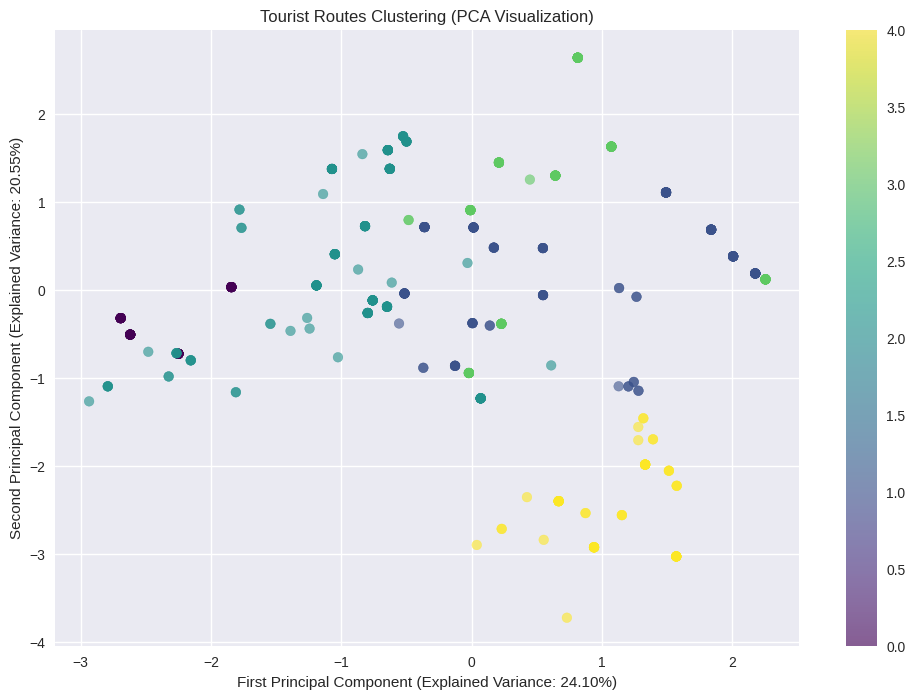

In [32]:
# 6. ADVANCED VISUALIZATIONS AND INSIGHTS

print("\n" + "="*60)
print("ADVANCED VISUALIZATIONS AND INSIGHTS")
print("="*60)

# Cluster visualization
print("1. Creating cluster visualizations...")

# PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', alpha=0.6)
plt.colorbar(scatter)
plt.xlabel(f'First Principal Component (Explained Variance: {pca.explained_variance_ratio_[0]:.2%})')
plt.ylabel(f'Second Principal Component (Explained Variance: {pca.explained_variance_ratio_[1]:.2%})')
plt.title('Tourist Routes Clustering (PCA Visualization)')
plt.show()

2. Creating cluster characteristics heatmap...


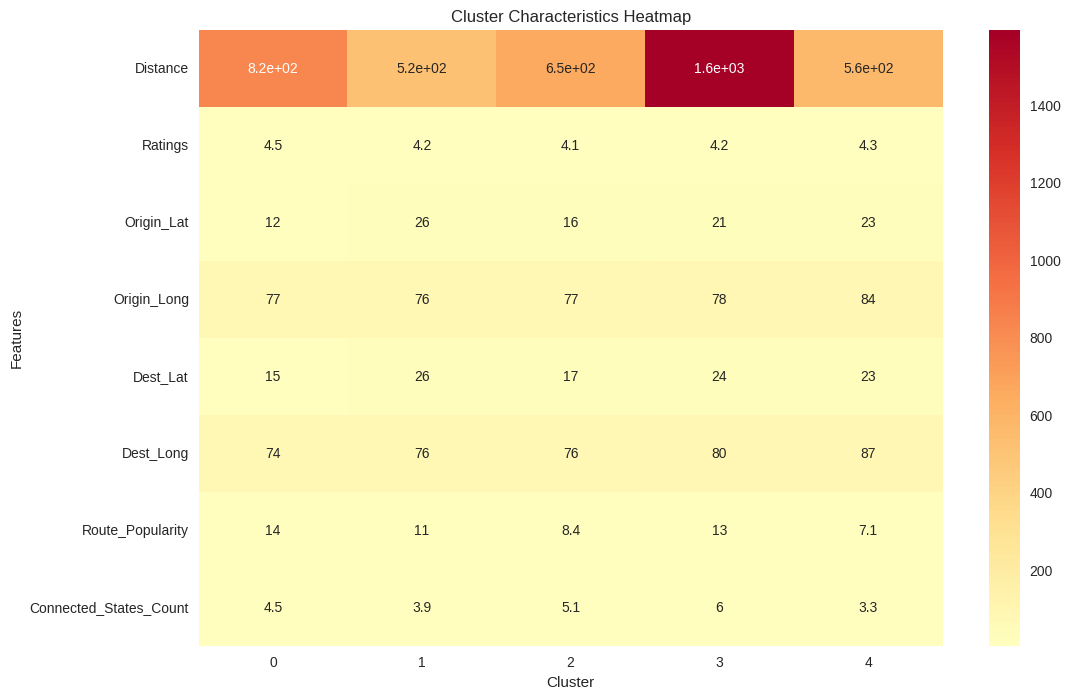

In [33]:
# Cluster characteristics heatmap
print("2. Creating cluster characteristics heatmap...")
cluster_means = df_features.groupby('Cluster')[clustering_features].mean()

plt.figure(figsize=(12, 8))
sns.heatmap(cluster_means.T, annot=True, cmap='RdYlBu_r', center=0)
plt.title('Cluster Characteristics Heatmap')
plt.xlabel('Cluster')
plt.ylabel('Features')
plt.show()

In [34]:
# Interactive cluster visualization
print("3. Creating interactive cluster visualization...")
fig = px.scatter_3d(df_features, x='Distance', y='Ratings', z='Route_Popularity',
                    color='Cluster',
                    hover_data=['Origin', 'Destination', 'Type'],
                    title='3D Cluster Visualization',
                    height=600)
fig.show()

3. Creating interactive cluster visualization...


In [36]:
# Route network visualization
print("4. Creating route network insights...")

# State-to-state connectivity
state_routes = df_features.groupby(['Origin_State', 'Dest_State']).size().reset_index(name='Route_Count')
state_routes = state_routes[state_routes['Route_Count'] > 5]  # Filter for significant connections

# Create a Sankey diagram to visualize state-to-state connectivity
# Need to map states to unique numerical indices for Sankey diagram
unique_states = pd.unique(state_routes[['Origin_State', 'Dest_State']].values.ravel())
state_map = {state: i for i, state in enumerate(unique_states)}

state_routes['Source'] = state_routes['Origin_State'].map(state_map)
state_routes['Target'] = state_routes['Dest_State'].map(state_map)

fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = unique_states,
      color = "blue"
    ),
    link = dict(
      source = state_routes['Source'],
      target = state_routes['Target'],
      value = state_routes['Route_Count'],
      label = state_routes.apply(lambda x: f"{x['Origin_State']} to {x['Dest_State']}: {x['Route_Count']}", axis=1)
  ))])

fig.update_layout(title_text="State-to-State Tourism Connectivity (Sankey Diagram)", font_size=10)
fig.show()

4. Creating route network insights...


5. Analyzing seasonal patterns...


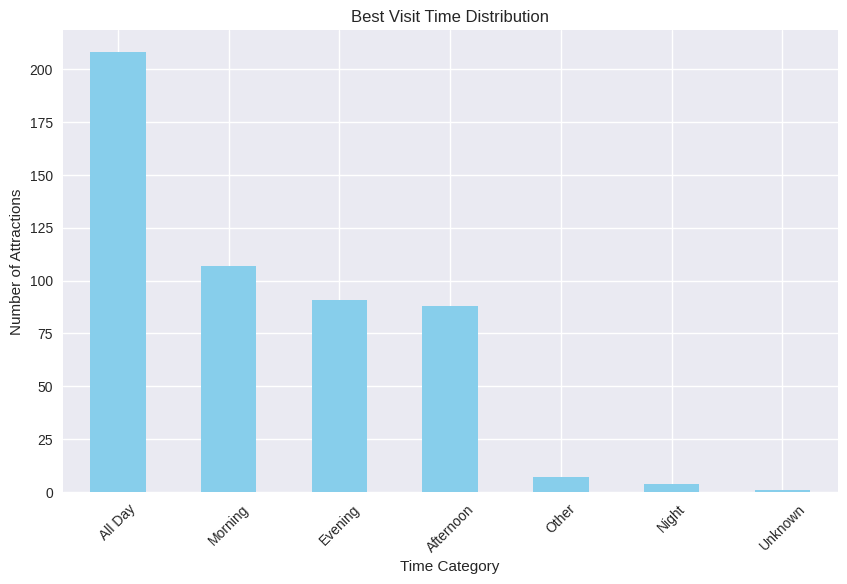

In [37]:
# Seasonal analysis
print("5. Analyzing seasonal patterns...")
seasonal_analysis = df_features['Visit_Time_Category'].value_counts()

plt.figure(figsize=(10, 6))
seasonal_analysis.plot(kind='bar', color='skyblue')
plt.title('Best Visit Time Distribution')
plt.xlabel('Time Category')
plt.ylabel('Number of Attractions')
plt.xticks(rotation=45)
plt.show()

6. Attraction type vs rating analysis...


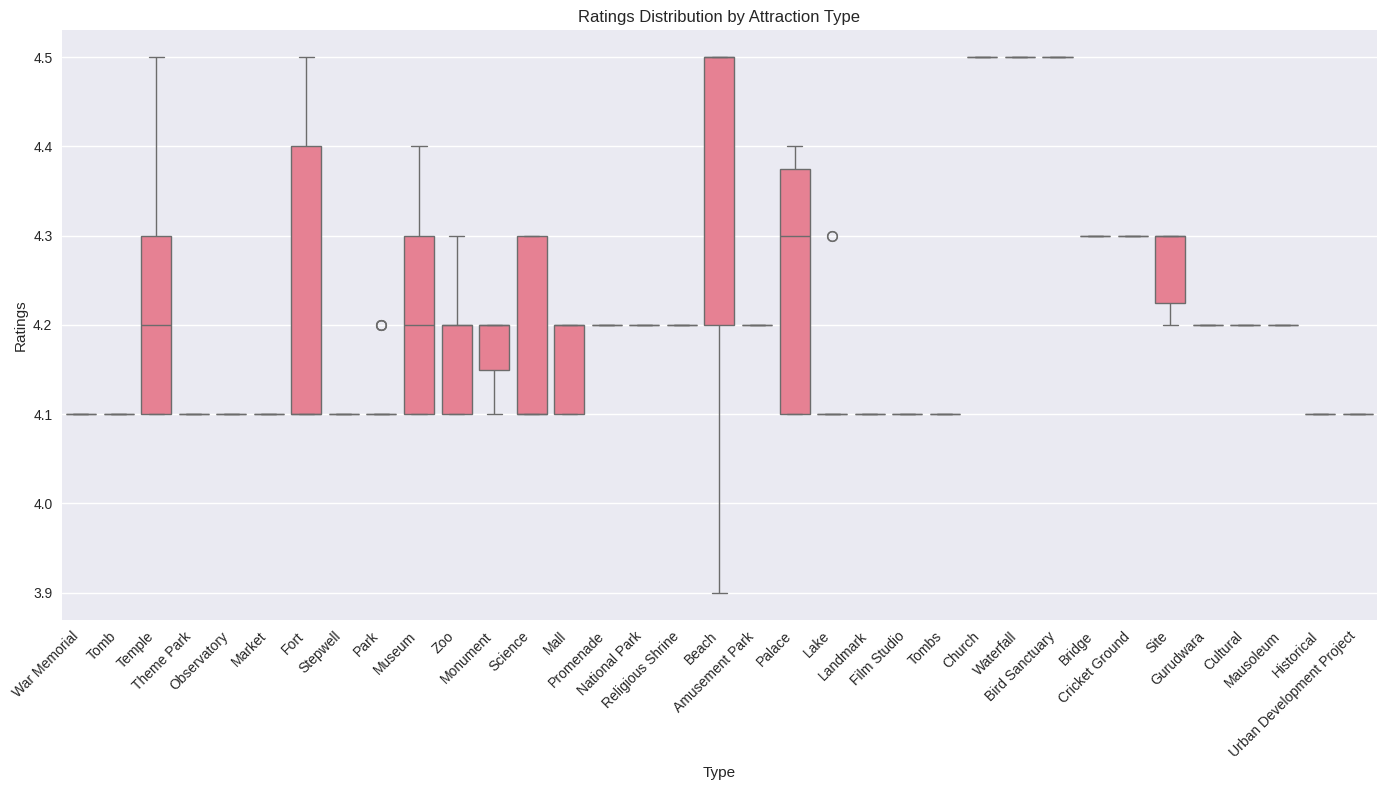

In [38]:
# Type vs Rating analysis
print("6. Attraction type vs rating analysis...")
plt.figure(figsize=(14, 8))
sns.boxplot(data=df_features, x='Type', y='Ratings')
plt.xticks(rotation=45, ha='right')
plt.title('Ratings Distribution by Attraction Type')
plt.tight_layout()
plt.show()

In [39]:
# 7. INSIGHTS AND RECOMMENDATIONS

print("\n" + "="*60)
print("KEY INSIGHTS AND RECOMMENDATIONS")
print("="*60)

print("\n1. CLUSTER INSIGHTS:")
print("-" * 20)
for i in range(optimal_k):
    cluster_data = df_features[df_features['Cluster'] == i]
    print(f"\nCluster {i}:")
    print(f"  - Size: {len(cluster_data)} routes")
    print(f"  - Avg Distance: {cluster_data['Distance'].mean():.0f} km")
    print(f"  - Avg Rating: {cluster_data['Ratings'].mean():.2f}")
    print(f"  - Most common type: {cluster_data['Type'].mode().iloc[0] if not cluster_data['Type'].empty else 'N/A'}")


KEY INSIGHTS AND RECOMMENDATIONS

1. CLUSTER INSIGHTS:
--------------------

Cluster 0:
  - Size: 56 routes
  - Avg Distance: 824 km
  - Avg Rating: 4.50
  - Most common type: Beach

Cluster 1:
  - Size: 135 routes
  - Avg Distance: 522 km
  - Avg Rating: 4.17
  - Most common type: Fort

Cluster 2:
  - Size: 150 routes
  - Avg Distance: 651 km
  - Avg Rating: 4.14
  - Most common type: Temple

Cluster 3:
  - Size: 102 routes
  - Avg Distance: 1593 km
  - Avg Rating: 4.17
  - Most common type: Temple

Cluster 4:
  - Size: 63 routes
  - Avg Distance: 564 km
  - Avg Rating: 4.28
  - Most common type: Temple


In [40]:
print("\n2. TOP PERFORMING ROUTES:")
print("-" * 28)
top_performers = df_features[df_features['Ratings'] >= 4.3].groupby(['Origin', 'Destination']).size().sort_values(ascending=False).head(5)
for route, count in top_performers.items():
    origin, dest = route
    avg_rating = df_features[(df_features['Origin'] == origin) & (df_features['Destination'] == dest)]['Ratings'].mean()
    print(f"  - {origin} → {dest}: {count} attractions, Avg rating: {avg_rating:.2f}")


2. TOP PERFORMING ROUTES:
----------------------------
  - Bengaluru → Goa: 14 attractions, Avg rating: 4.50
  - Kochi → Goa: 14 attractions, Avg rating: 4.50
  - Hyderabad → Goa: 14 attractions, Avg rating: 4.50
  - Thiruvananthapuram → Goa: 14 attractions, Avg rating: 4.50
  - Patna → Kolkata: 10 attractions, Avg rating: 4.30


In [41]:
print("\n3. DISTANCE INSIGHTS:")
print("-" * 21)
distance_insights = df_features['Distance_Category'].value_counts()
for category, count in distance_insights.items():
    avg_rating = df_features[df_features['Distance_Category'] == category]['Ratings'].mean()
    print(f"  - {category} distance routes: {count} ({count/len(df_features)*100:.1f}%), Avg rating: {avg_rating:.2f}")


3. DISTANCE INSIGHTS:
---------------------
  - Long distance routes: 260 (51.4%), Avg rating: 4.22
  - Very Long distance routes: 140 (27.7%), Avg rating: 4.20
  - Medium distance routes: 92 (18.2%), Avg rating: 4.20
  - Short distance routes: 14 (2.8%), Avg rating: 4.19


In [42]:
print("\n4. RECOMMENDATIONS:")
print("-" * 18)
print("  - Focus marketing on high-rating, short-distance routes for weekend trips")
print("  - Develop packages combining multiple attractions in popular route clusters")
print("  - Improve infrastructure for medium-distance routes with high potential")
print("  - Create seasonal campaigns based on optimal visit times")
print("  - Develop state-connectivity programs for less connected regions")


4. RECOMMENDATIONS:
------------------
  - Focus marketing on high-rating, short-distance routes for weekend trips
  - Develop packages combining multiple attractions in popular route clusters
  - Improve infrastructure for medium-distance routes with high potential
  - Create seasonal campaigns based on optimal visit times
  - Develop state-connectivity programs for less connected regions


In [43]:
# Save results
print("\n5. SAVING RESULTS:")
print("-" * 17)
df_features.to_csv('tourism_analysis_results.csv', index=False)
cluster_analysis.to_csv('cluster_analysis_results.csv')
popular_routes.to_csv('popular_routes_analysis.csv')

print("  ✓ Analysis results saved to 'tourism_analysis_results.csv'")
print("  ✓ Cluster analysis saved to 'cluster_analysis_results.csv'")
print("  ✓ Popular routes saved to 'popular_routes_analysis.csv'")

print("\n" + "="*60)
print("ANALYSIS COMPLETED SUCCESSFULLY!")
print("="*60)


5. SAVING RESULTS:
-----------------
  ✓ Analysis results saved to 'tourism_analysis_results.csv'
  ✓ Cluster analysis saved to 'cluster_analysis_results.csv'
  ✓ Popular routes saved to 'popular_routes_analysis.csv'

ANALYSIS COMPLETED SUCCESSFULLY!
